In [67]:
import json
import pickle
import numpy as np
#import seaborn as sns

#import matplotlib.pyplot as plt
from json_repair import repair_json

from itertools import chain
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import MultiLabelBinarizer

### Read data

In [441]:
# Load the pickled list
with open("/Utilisateurs/umushtaq/emotion_analysis_comics/comics_ZSL/results/comics35_zs_llama-3-8b-Instruct-bnb-4bit/results.pickle", 'rb') as f:
    
    results = pickle.load(f)

In [442]:
results

{'grounds': [['fear', 'surprise'],
  ['surprise'],
  ['fear'],
  ['surprise'],
  ['anger'],
  ['anger', 'surprise'],
  ['joy'],
  ['joy'],
  ['fear'],
  ['surprise'],
  ['joy'],
  ['fear', 'surprise'],
  ['joy'],
  ['fear'],
  ['joy'],
  ['fear', 'sadness'],
  ['surprise'],
  ['anger', 'sadness'],
  ['anger'],
  ['anger'],
  ['anger'],
  ['fear'],
  ['surprise'],
  ['surprise'],
  ['fear', 'surprise'],
  ['fear'],
  ['anger'],
  ['surprise'],
  ['anger', 'joy'],
  ['anger'],
  ['joy'],
  ['surprise'],
  ['joy'],
  ['surprise'],
  ['fear'],
  ['surprise'],
  ['joy'],
  ['fear'],
  ['fear', 'joy'],
  ['fear', 'surprise'],
  ['joy'],
  ['sadness', 'surprise'],
  ['surprise'],
  ['anger', 'sadness'],
  ['anger', 'sadness'],
  ['anger'],
  ['anger'],
  ['anger', 'disgust'],
  ['neutral'],
  ['surprise'],
  ['fear'],
  ['surprise'],
  ['fear', 'joy'],
  ['fear', 'joy'],
  ['surprise'],
  ['fear', 'joy'],
  ['fear', 'joy'],
  ['joy'],
  ['fear', 'sadness'],
  ['surprise'],
  ['sadness'],
  ['

In [443]:
results.keys()

dict_keys(['grounds', 'predictions'])

In [444]:
#all_labels = ["Anger", "Disgust", "Fear", "Sadness", "Surprise", "Joy"]

In [445]:
grounds = results['grounds']
predictions = results['predictions']

In [446]:
len(grounds), len(predictions)

(7129, 7129)

In [447]:
grounds

[['fear', 'surprise'],
 ['surprise'],
 ['fear'],
 ['surprise'],
 ['anger'],
 ['anger', 'surprise'],
 ['joy'],
 ['joy'],
 ['fear'],
 ['surprise'],
 ['joy'],
 ['fear', 'surprise'],
 ['joy'],
 ['fear'],
 ['joy'],
 ['fear', 'sadness'],
 ['surprise'],
 ['anger', 'sadness'],
 ['anger'],
 ['anger'],
 ['anger'],
 ['fear'],
 ['surprise'],
 ['surprise'],
 ['fear', 'surprise'],
 ['fear'],
 ['anger'],
 ['surprise'],
 ['anger', 'joy'],
 ['anger'],
 ['joy'],
 ['surprise'],
 ['joy'],
 ['surprise'],
 ['fear'],
 ['surprise'],
 ['joy'],
 ['fear'],
 ['fear', 'joy'],
 ['fear', 'surprise'],
 ['joy'],
 ['sadness', 'surprise'],
 ['surprise'],
 ['anger', 'sadness'],
 ['anger', 'sadness'],
 ['anger'],
 ['anger'],
 ['anger', 'disgust'],
 ['neutral'],
 ['surprise'],
 ['fear'],
 ['surprise'],
 ['fear', 'joy'],
 ['fear', 'joy'],
 ['surprise'],
 ['fear', 'joy'],
 ['fear', 'joy'],
 ['joy'],
 ['fear', 'sadness'],
 ['surprise'],
 ['sadness'],
 ['fear', 'surprise'],
 ['fear'],
 ['surprise'],
 ['sadness'],
 ['joy'],
 ['

In [448]:
predictions

['user\n\n### Emotion Analysis Expert Role\n\nYou are an advanced emotion analysis expert specializing in comic book dialogue interpretation. Your task is to analyze utterances and identify their emotional content.\n\nINPUT:\n- You will receive a single utterance from a comic book\n- The utterance may express one or multiple emotions\n\nTASK:\n1. Carefully analyze the emotional context and tone of the utterance\n2. Identify applicable emotions from the following classes:\n   "anger", "disgust", "fear", "sadness", "surprise", "joy", "neutral"\n\nOUTPUT REQUIREMENTS:\n- Format: JSON object with a single key "list_emotion_classes"\n- Value: Array of one or more emotion classes as strings\n- Example: {"list_emotion_classes": ["anger", "fear"]}\n\nIMPORTANT NOTES:\n- Do not include any explanations in the output, only the JSON objectassistant\n\nInput: "DID YOU HAVE TO ELECTROCUTE HER SO HARD?"\nOutput:assistant\n\n{"list_emotion_classes": ["anger", "surprise"]}',
 'user\n\n### Emotion Anal

In [449]:
predictions = [x.split("\nOutput:assistant\n\n")[1] for x in predictions]

In [450]:
predictions

['{"list_emotion_classes": ["anger", "surprise"]}',
 '{"list_emotion_classes": ["anger", "disgust"]}',
 '{"list_emotion_classes": ["anger", "surprise"]}',
 '{"list_emotion_classes": ["surprise", "joy"]}',
 '{"list_emotion_classes": ["anger", "disgust"]}',
 '{"list_emotion_classes": ["anger", "disgust"]}',
 '{"list_emotion_classes": ["anger", "fear"]}',
 '{"list_emotion_classes": ["surprise", "fear"]}',
 '{"list_emotion_classes": ["anger"]}',
 '{"list_emotion_classes": ["anger", "surprise"]}',
 '{"list_emotion_classes": ["anger", "disgust", "fear"]}',
 '{"list_emotion_classes": ["surprise", "joy"]}',
 '{"list_emotion_classes": ["fear", "surprise"]}',
 '{"list_emotion_classes": ["anger", "fear", "sadness"]}',
 '{"list_emotion_classes": ["anger", "disgust"]}',
 '{"list_emotion_classes": ["anger", "fear", "surprise"]}',
 '{"list_emotion_classes": ["anger", "neutral"]}',
 '{"list_emotion_classes": ["sadness", "disgust"]}',
 '{"list_emotion_classes": ["neutral"]}',
 '{"list_emotion_classes":

In [439]:
# for idx, (i,j) in enumerate(zip(grounds, predictions)):
    
#     if len(i) < len(j):
#         #processed_preds[idx] = processed_preds[idx][:i]
#         #print(idx, len(i), len(j))
#         predictions[idx] = predictions[idx][:len(i)]
#         #bad_idx.append(idx)

In [440]:
bad_idx = []

for idx, (i,j) in enumerate(zip(grounds, predictions)):
    if len(i) != len(j):
        print(idx, len(i), len(j))
        bad_idx.append(idx)

0 2 47
1 1 46
2 1 47
3 1 45
4 1 46
5 2 46
6 1 43
7 1 46
8 1 35
9 1 47
10 1 54
11 2 45
12 1 46
13 1 54
14 1 46
15 2 55
16 1 46
17 2 48
18 1 37
19 1 43
20 1 47
21 1 47
22 1 47
23 1 47
24 2 46
25 1 45
26 1 47
27 1 54
28 2 54
29 1 47
30 1 35
31 1 47
32 1 54
33 1 47
34 1 43
35 1 47
36 1 47
37 1 47
38 2 43
39 2 43
40 1 44
41 2 48
42 1 47
43 2 47
44 2 46
45 1 47
46 1 47
47 2 47
48 1 46
49 1 43
50 1 43
51 1 59
52 2 43
53 2 62
54 1 46
55 2 43
56 2 43
57 1 43
58 2 43
59 1 57
60 1 45
61 2 46
62 1 54
63 1 54
64 1 45
65 1 44
66 1 46
67 2 43
68 1 43
69 1 43
70 1 54
71 1 47
72 1 54
73 1 46
74 1 55
75 1 54
76 1 45
77 1 47
78 1 47
79 1 44
80 1 43
81 1 47
82 1 43
83 1 43
84 1 54
85 1 44
86 1 42
87 1 43
88 1 47
89 1 55
90 2 47
91 1 43
92 1 43
93 1 55
94 2 47
95 2 47
96 2 43
97 2 43
98 1 47
99 1 47
100 1 43
101 2 47
102 1 46
103 1 35
104 2 45
105 1 47
106 1 43
107 1 47
108 1 46
109 1 47
110 1 37
111 1 57
112 1 47
113 1 54
114 1 57
115 2 45
116 1 49
117 1 46
118 2 43
119 3 46
120 2 43
121 1 47
122 1 55
123

In [386]:
grounds = [item for i, item in enumerate(grounds) if i not in bad_idx]
predictions = [item for i, item in enumerate(predictions) if i not in bad_idx]


In [387]:
len(grounds), len(predictions)

(3111, 3111)

In [388]:
predictions

[['anger'],
 ['anger'],
 ['surprise'],
 ['anger'],
 ['fear'],
 ['surprise'],
 ['surprise'],
 ['surprise'],
 ['surprise'],
 ['neutral'],
 ['anger'],
 ['joy'],
 ['joy'],
 ['neutral'],
 ['anger'],
 ['anger'],
 ['anger'],
 ['surprise'],
 ['surprise'],
 ['joy'],
 ['surprise'],
 ['surprise'],
 ['anger'],
 ['surprise'],
 ['surprise'],
 ['surprise'],
 ['surprise'],
 ['surprise'],
 ['anger'],
 ['surprise'],
 ['surprise'],
 ['joy'],
 ['surprise'],
 ['surprise'],
 ['surprise'],
 ['surprise'],
 ['surprise'],
 ['anger'],
 ['anger'],
 ['neutral'],
 ['anger'],
 ['surprise'],
 ['joy'],
 ['anger,sadness'],
 ['anger'],
 ['joy'],
 ['joy'],
 ['joy'],
 ['anger'],
 ['joy'],
 ['sadness'],
 ['surprise'],
 ['anger'],
 ['anger'],
 ['surprise'],
 ['anger'],
 ['joy'],
 ['surprise'],
 ['joy'],
 ['joy'],
 ['surprise'],
 ['surprise, anger'],
 ['surprise'],
 ['surprise'],
 ['anger'],
 ['joy'],
 ['joy'],
 ['surprise, fear'],
 ['anger'],
 ['surprise'],
 ['anger'],
 ['anger'],
 ['anger'],
 ['anger'],
 ['surprise, anger'

In [389]:
grounds = [item for sublist in grounds for item in sublist]
predictions = [item for sublist in predictions for item in sublist]

In [390]:
predictions

['anger',
 'anger',
 'surprise',
 'anger',
 'fear',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'neutral',
 'anger',
 'joy',
 'joy',
 'neutral',
 'anger',
 'anger',
 'anger',
 'surprise',
 'surprise',
 'joy',
 'surprise',
 'surprise',
 'anger',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'anger',
 'surprise',
 'surprise',
 'joy',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'anger',
 'anger',
 'neutral',
 'anger',
 'surprise',
 'joy',
 'anger,sadness',
 'anger',
 'joy',
 'joy',
 'joy',
 'anger',
 'joy',
 'sadness',
 'surprise',
 'anger',
 'anger',
 'surprise',
 'anger',
 'joy',
 'surprise',
 'joy',
 'joy',
 'surprise',
 'surprise, anger',
 'surprise',
 'surprise',
 'anger',
 'joy',
 'joy',
 'surprise, fear',
 'anger',
 'surprise',
 'anger',
 'anger',
 'anger',
 'anger',
 'surprise, anger',
 'surprise',
 'surprise',
 'anger',
 'anger',
 'joy',
 'anger',
 'joy',
 'anger',
 'neutral',
 'sadness',
 'anger',
 'anger,fear',
 'sadness, anger

In [391]:
print(classification_report(grounds, predictions, digits=3))

                          precision    recall  f1-score   support

                   anger      0.489     0.516     0.502       793
              anger, joy      0.000     0.000     0.000         0
              anger,fear      0.000     0.000     0.000         0
           anger,sadness      0.000     0.000     0.000         0
          anger,surprise      0.000     0.000     0.000         0
              apologetic      0.000     0.000     0.000         0
               curiosity      0.000     0.000     0.000         0
          disappointment      0.000     0.000     0.000         0
                 disgust      0.125     0.087     0.103        23
         disgust,sadness      0.000     0.000     0.000         0
                    fear      0.315     0.101     0.153       335
             fear, anger      0.000     0.000     0.000         0
          fear, surprise      0.000     0.000     0.000         0
              irony, joy      0.000     0.000     0.000         0
         

/Utilisateurs/umushtaq/.conda/envs/triton_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Utilisateurs/umushtaq/.conda/envs/triton_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Utilisateurs/umushtaq/.conda/envs/triton_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

In [334]:
#grounds = [json.loads(x)["page_utterance_emotions"] for x in grounds]

In [335]:
#import re

In [336]:
# processed_preds = []
# bad_idx = []

# for i, input_string in enumerate(predictions):
    
#     json_content = re.search(r'\{.*\}', input_string, re.DOTALL)
    
#     if json_content:
#         json_string = json_content.group()
#         processed_preds.append(json_string)
#     else:    
#         bad_idx.append(i)
#         print(i)
        

In [451]:
bad_idx = []
processed_preds = []

for i,x in enumerate(predictions):
    try:
        y = repair_json(x)
        processed_preds.append(json.loads(y)["list_emotion_classes"])
    except:
        print(i)
        bad_idx.append(i)

597
651
1174
1179
1232
1244
4149
4216
4249
4840
6739
6762
6845
6847
6865
6900
6985
7067


In [452]:
processed_preds

[['anger', 'surprise'],
 ['anger', 'disgust'],
 ['anger', 'surprise'],
 ['surprise', 'joy'],
 ['anger', 'disgust'],
 ['anger', 'disgust'],
 ['anger', 'fear'],
 ['surprise', 'fear'],
 ['anger'],
 ['anger', 'surprise'],
 ['anger', 'disgust', 'fear'],
 ['surprise', 'joy'],
 ['fear', 'surprise'],
 ['anger', 'fear', 'sadness'],
 ['anger', 'disgust'],
 ['anger', 'fear', 'surprise'],
 ['anger', 'neutral'],
 ['sadness', 'disgust'],
 ['neutral'],
 ['anger', 'fear'],
 ['anger', 'surprise'],
 ['anger', 'surprise'],
 ['anger', 'surprise'],
 ['anger', 'surprise'],
 ['anger', 'disgust'],
 ['joy', 'surprise'],
 ['anger', 'surprise'],
 ['anger', 'disgust', 'fear'],
 ['anger', 'disgust', 'fear'],
 ['anger', 'surprise'],
 ['anger'],
 ['anger', 'surprise'],
 ['anger', 'disgust', 'fear'],
 ['anger', 'surprise'],
 ['anger', 'fear'],
 ['anger', 'surprise'],
 ['anger', 'surprise'],
 ['anger', 'surprise'],
 ['anger', 'fear'],
 ['anger', 'fear'],
 ['joy', 'neutral'],
 ['sadness', 'disgust'],
 ['anger', 'surpri

In [453]:
len(grounds), len(processed_preds)

(7129, 7111)

In [454]:
grounds = [item for i, item in enumerate(grounds) if i not in bad_idx]
#processed_preds = [item for i, item in enumerate(processed_preds) if i not in bad_idx]


In [455]:
len(grounds), len(processed_preds)

(7111, 7111)

In [456]:
#len(grounds), len(predictions)

In [457]:
#grounds

In [458]:
#import ast

In [459]:
#grounds = [ast.literal_eval(x) for x in grounds]

In [460]:
#grounds

In [461]:
processed_preds

[['anger', 'surprise'],
 ['anger', 'disgust'],
 ['anger', 'surprise'],
 ['surprise', 'joy'],
 ['anger', 'disgust'],
 ['anger', 'disgust'],
 ['anger', 'fear'],
 ['surprise', 'fear'],
 ['anger'],
 ['anger', 'surprise'],
 ['anger', 'disgust', 'fear'],
 ['surprise', 'joy'],
 ['fear', 'surprise'],
 ['anger', 'fear', 'sadness'],
 ['anger', 'disgust'],
 ['anger', 'fear', 'surprise'],
 ['anger', 'neutral'],
 ['sadness', 'disgust'],
 ['neutral'],
 ['anger', 'fear'],
 ['anger', 'surprise'],
 ['anger', 'surprise'],
 ['anger', 'surprise'],
 ['anger', 'surprise'],
 ['anger', 'disgust'],
 ['joy', 'surprise'],
 ['anger', 'surprise'],
 ['anger', 'disgust', 'fear'],
 ['anger', 'disgust', 'fear'],
 ['anger', 'surprise'],
 ['anger'],
 ['anger', 'surprise'],
 ['anger', 'disgust', 'fear'],
 ['anger', 'surprise'],
 ['anger', 'fear'],
 ['anger', 'surprise'],
 ['anger', 'surprise'],
 ['anger', 'surprise'],
 ['anger', 'fear'],
 ['anger', 'fear'],
 ['joy', 'neutral'],
 ['sadness', 'disgust'],
 ['anger', 'surpri

In [462]:
grounds

[['fear', 'surprise'],
 ['surprise'],
 ['fear'],
 ['surprise'],
 ['anger'],
 ['anger', 'surprise'],
 ['joy'],
 ['joy'],
 ['fear'],
 ['surprise'],
 ['joy'],
 ['fear', 'surprise'],
 ['joy'],
 ['fear'],
 ['joy'],
 ['fear', 'sadness'],
 ['surprise'],
 ['anger', 'sadness'],
 ['anger'],
 ['anger'],
 ['anger'],
 ['fear'],
 ['surprise'],
 ['surprise'],
 ['fear', 'surprise'],
 ['fear'],
 ['anger'],
 ['surprise'],
 ['anger', 'joy'],
 ['anger'],
 ['joy'],
 ['surprise'],
 ['joy'],
 ['surprise'],
 ['fear'],
 ['surprise'],
 ['joy'],
 ['fear'],
 ['fear', 'joy'],
 ['fear', 'surprise'],
 ['joy'],
 ['sadness', 'surprise'],
 ['surprise'],
 ['anger', 'sadness'],
 ['anger', 'sadness'],
 ['anger'],
 ['anger'],
 ['anger', 'disgust'],
 ['neutral'],
 ['surprise'],
 ['fear'],
 ['surprise'],
 ['fear', 'joy'],
 ['fear', 'joy'],
 ['surprise'],
 ['fear', 'joy'],
 ['fear', 'joy'],
 ['joy'],
 ['fear', 'sadness'],
 ['surprise'],
 ['sadness'],
 ['fear', 'surprise'],
 ['fear'],
 ['surprise'],
 ['sadness'],
 ['joy'],
 ['

In [202]:
import ast

grounds = [ast.literal_eval(x) for x in grounds]

In [463]:
for idx, (i,j) in enumerate(zip(grounds, processed_preds)):
    
    if len(i) < len(j):
        #processed_preds[idx] = processed_preds[idx][:i]
        #print(idx, len(i), len(j))
        processed_preds[idx] = processed_preds[idx][:len(i)]
        #bad_idx.append(idx)

In [464]:
bad_idx = []

for idx, (i,j) in enumerate(zip(grounds, processed_preds)):
    if len(i) != len(j):
        print(idx, len(i), len(j))
        bad_idx.append(idx)

119 3 2
146 2 1
157 2 1
207 2 1
218 2 1
232 3 2
304 3 2
330 3 1
332 3 1
334 3 2
339 3 2
347 3 2
353 3 2
354 3 2
360 3 2
376 2 1
410 3 2
440 3 2
446 3 2
476 3 2
479 3 2
565 3 2
568 3 2
570 3 2
589 2 1
593 2 1
608 2 1
611 3 2
652 3 2
662 2 1
668 3 2
672 3 2
679 2 1
742 2 1
792 2 1
843 2 1
854 2 1
952 3 2
980 2 1
1008 2 1
1054 3 2
1058 3 2
1092 3 2
1093 3 2
1105 2 1
1126 2 1
1135 3 2
1161 3 2
1172 3 2
1173 3 2
1199 3 2
1200 3 2
1221 2 1
1228 3 2
1229 3 2
1238 3 2
1256 2 1
1261 3 2
1290 3 2
1298 3 2
1300 2 1
1305 2 1
1314 2 1
1319 3 2
1328 3 2
1329 2 1
1396 3 2
1398 3 2
1419 3 2
1475 3 2
1643 3 2
1693 3 2
1694 3 2
1695 2 1
1702 2 1
1801 3 2
1825 2 1
1907 2 1
1927 2 1
1931 2 1
1958 2 1
1964 2 1
1972 2 1
1994 2 1
2010 3 2
2012 3 2
2013 2 1
2019 3 2
2024 3 2
2025 3 2
2036 2 1
2080 3 2
2097 3 2
2098 3 2
2198 3 2
2211 4 2
2221 3 2
2228 2 1
2271 3 2
2363 2 1
2423 2 1
2446 2 1
2447 2 1
2503 2 1
2516 2 1
2649 3 2
2654 2 1
2665 3 2
2666 3 2
2667 3 2
2695 3 2
2777 3 2
2778 3 2
2779 3 2
2805 3 2
2834

In [465]:
len(bad_idx)

333

In [466]:
grounds = [item for i, item in enumerate(grounds) if i not in bad_idx]
processed_preds = [item for i, item in enumerate(processed_preds) if i not in bad_idx]


In [467]:
# bad_idx.sort(reverse=True)

# # Remove elements from 'grounds' at the specified indices
# for idx in bad_idx:
    
#     del grounds[idx]
#     del processed_preds[idx]

In [468]:
len(grounds), len(processed_preds)

(6778, 6778)

In [419]:
grounds = [item for sublist in grounds for item in sublist]
predictions = [item for sublist in processed_preds for item in sublist]

In [420]:
#grounds = [[item for inner in outer for item in inner] for outer in grounds]
#predictions = [[item for inner in outer for item in inner] for outer in predictions]

In [470]:
len(grounds), len(processed_preds)

(6778, 6778)

In [422]:
grounds

['fear',
 'surprise',
 'surprise',
 'fear',
 'surprise',
 'anger',
 'anger',
 'surprise',
 'joy',
 'joy',
 'fear',
 'surprise',
 'joy',
 'fear',
 'surprise',
 'joy',
 'fear',
 'joy',
 'fear',
 'sadness',
 'surprise',
 'anger',
 'sadness',
 'anger',
 'anger',
 'anger',
 'fear',
 'surprise',
 'surprise',
 'fear',
 'surprise',
 'fear',
 'anger',
 'surprise',
 'anger',
 'joy',
 'anger',
 'joy',
 'surprise',
 'joy',
 'surprise',
 'fear',
 'surprise',
 'joy',
 'fear',
 'fear',
 'joy',
 'fear',
 'surprise',
 'joy',
 'sadness',
 'surprise',
 'surprise',
 'anger',
 'sadness',
 'anger',
 'sadness',
 'anger',
 'anger',
 'anger',
 'disgust',
 'neutral',
 'surprise',
 'fear',
 'surprise',
 'fear',
 'joy',
 'fear',
 'joy',
 'surprise',
 'fear',
 'joy',
 'fear',
 'joy',
 'joy',
 'fear',
 'sadness',
 'surprise',
 'sadness',
 'fear',
 'surprise',
 'fear',
 'surprise',
 'sadness',
 'joy',
 'joy',
 'surprise',
 'joy',
 'joy',
 'fear',
 'sadness',
 'surprise',
 'joy',
 'sadness',
 'surprise',
 'sadness',


In [423]:
predictions

['anger',
 'surprise',
 'anger',
 'anger',
 'surprise',
 'anger',
 'anger',
 'disgust',
 'anger',
 'surprise',
 'anger',
 'anger',
 'anger',
 'surprise',
 'joy',
 'fear',
 'anger',
 'anger',
 'anger',
 'fear',
 'anger',
 'sadness',
 'disgust',
 'neutral',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'disgust',
 'joy',
 'anger',
 'anger',
 'anger',
 'disgust',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'fear',
 'anger',
 'fear',
 'joy',
 'sadness',
 'disgust',
 'anger',
 'anger',
 'surprise',
 'anger',
 'disgust',
 'anger',
 'anger',
 'anger',
 'surprise',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'fear',
 'anger',
 'fear',
 'anger',
 'anger',
 'fear',
 'anger',
 'fear',
 'anger',
 'anger',
 'fear',
 'surprise',
 'surprise',
 'anger',
 'disgust',
 'anger',
 'anger',
 'joy',
 'joy',
 'disgust',
 'anger',
 'fear',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'joy',
 'surp

In [472]:
mlb = MultiLabelBinarizer()

In [473]:
y_true_mhot = mlb.fit_transform(grounds)
y_pred_mhot = mlb.transform(processed_preds)

/Utilisateurs/umushtaq/.conda/envs/triton_env/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:909: UserWarning: unknown class(es) ['anticipation', 'apologetic', 'apology', 'compassion', 'concern', 'conviction', 'curiosity', 'desperation', 'determination', 'frustration', 'gratitude', 'guilt', 'helpfulness', 'hope', 'love', 'pleading', 'relief', 'suspicion', 'trust', 'urgency', 'warmth'] will be ignored
  warnings.warn(


In [474]:
y_true_mhot.shape, y_pred_mhot.shape

((6778, 7), (6778, 7))

In [476]:
print(classification_report(y_true_mhot, y_pred_mhot, target_names=mlb.classes_, digits=3))

              precision    recall  f1-score   support

       anger      0.401     0.850     0.545      2157
     disgust      0.206     0.507     0.293       282
        fear      0.490     0.327     0.392      1502
         joy      0.622     0.278     0.384      1622
     neutral      0.109     0.037     0.055       437
     sadness      0.641     0.245     0.354      1634
    surprise      0.563     0.492     0.525      1632

   micro avg      0.450     0.446     0.448      9266
   macro avg      0.433     0.391     0.364      9266
weighted avg      0.505     0.446     0.424      9266
 samples avg      0.423     0.421     0.422      9266



/Utilisateurs/umushtaq/.conda/envs/triton_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [484]:
%pip install matplotlib
#!pip install seaborn

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 38.0 MB/s eta 0:00:000:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [486]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [498]:
cm_g = [item for sublist in grounds for item in sublist]
cm_p = [item for sublist in processed_preds for item in sublist]

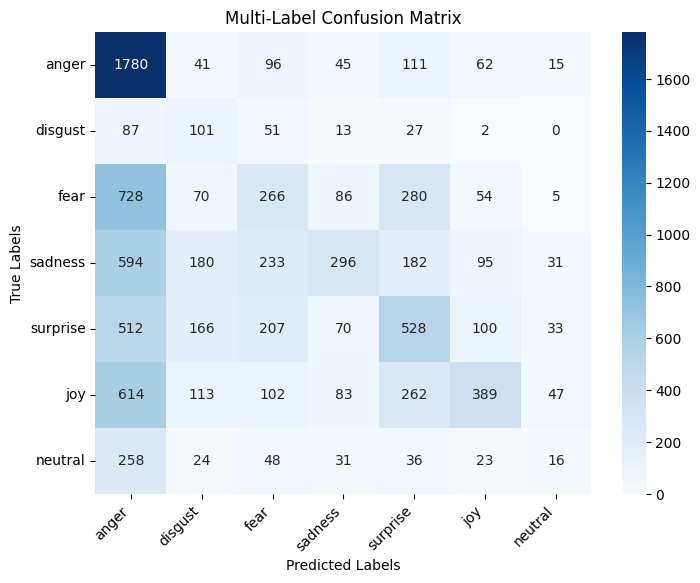

In [499]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Convert multi-label arrays into string representations of label combinations
def encode_labels(mhot_matrix, mlb):
    return ["|".join(mlb.inverse_transform(np.array(row).reshape(1, -1))[0]) if any(row) else "None" for row in mhot_matrix]

# Convert multi-hot encoded arrays to label strings
y_true_labels = encode_labels(y_true_mhot, mlb)
y_pred_labels = encode_labels(y_pred_mhot, mlb)

# Get unique class combinations
#all_labels = sorted(set(y_true_labels) | set(y_pred_labels))

all_labels = ["anger", "disgust", "fear", "sadness", "surprise", "joy", "neutral"]

# Compute confusion matrix
#cm = confusion_matrix(y_true_labels, y_pred_labels, labels=all_labels)
cm = confusion_matrix(cm_g, cm_p, labels=all_labels)

#cm = confusion_matrix(grounds, processed_preds, labels=all_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Multi-Label Confusion Matrix")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()


In [494]:
grounds

[['fear', 'surprise'],
 ['surprise'],
 ['fear'],
 ['surprise'],
 ['anger'],
 ['anger', 'surprise'],
 ['joy'],
 ['joy'],
 ['fear'],
 ['surprise'],
 ['joy'],
 ['fear', 'surprise'],
 ['joy'],
 ['fear'],
 ['joy'],
 ['fear', 'sadness'],
 ['surprise'],
 ['anger', 'sadness'],
 ['anger'],
 ['anger'],
 ['anger'],
 ['fear'],
 ['surprise'],
 ['surprise'],
 ['fear', 'surprise'],
 ['fear'],
 ['anger'],
 ['surprise'],
 ['anger', 'joy'],
 ['anger'],
 ['joy'],
 ['surprise'],
 ['joy'],
 ['surprise'],
 ['fear'],
 ['surprise'],
 ['joy'],
 ['fear'],
 ['fear', 'joy'],
 ['fear', 'surprise'],
 ['joy'],
 ['sadness', 'surprise'],
 ['surprise'],
 ['anger', 'sadness'],
 ['anger', 'sadness'],
 ['anger'],
 ['anger'],
 ['anger', 'disgust'],
 ['neutral'],
 ['surprise'],
 ['fear'],
 ['surprise'],
 ['fear', 'joy'],
 ['fear', 'joy'],
 ['surprise'],
 ['fear', 'joy'],
 ['fear', 'joy'],
 ['joy'],
 ['fear', 'sadness'],
 ['surprise'],
 ['sadness'],
 ['fear', 'surprise'],
 ['fear'],
 ['surprise'],
 ['sadness'],
 ['joy'],
 ['

In [495]:
processed_preds

[['anger', 'surprise'],
 ['anger'],
 ['anger'],
 ['surprise'],
 ['anger'],
 ['anger', 'disgust'],
 ['anger'],
 ['surprise'],
 ['anger'],
 ['anger'],
 ['anger'],
 ['surprise', 'joy'],
 ['fear'],
 ['anger'],
 ['anger'],
 ['anger', 'fear'],
 ['anger'],
 ['sadness', 'disgust'],
 ['neutral'],
 ['anger'],
 ['anger'],
 ['anger'],
 ['anger'],
 ['anger'],
 ['anger', 'disgust'],
 ['joy'],
 ['anger'],
 ['anger'],
 ['anger', 'disgust'],
 ['anger'],
 ['anger'],
 ['anger'],
 ['anger'],
 ['anger'],
 ['anger'],
 ['anger'],
 ['anger'],
 ['anger'],
 ['anger', 'fear'],
 ['anger', 'fear'],
 ['joy'],
 ['sadness', 'disgust'],
 ['anger'],
 ['anger', 'surprise'],
 ['anger', 'disgust'],
 ['anger'],
 ['anger'],
 ['anger', 'surprise'],
 ['anger'],
 ['anger'],
 ['anger'],
 ['anger'],
 ['anger', 'fear'],
 ['anger', 'fear'],
 ['anger'],
 ['anger', 'fear'],
 ['anger', 'fear'],
 ['anger'],
 ['anger', 'fear'],
 ['surprise'],
 ['surprise'],
 ['anger', 'disgust'],
 ['anger'],
 ['anger'],
 ['joy'],
 ['joy'],
 ['disgust']

In [496]:
cm_g = [item for sublist in grounds for item in sublist]
cm_p = [item for sublist in processed_preds for item in sublist]

In [497]:
len(cm_g), len(cm_p)

(9266, 9266)

In [259]:
print(classification_report(y_true_mhot, y_pred_mhot, target_names=mlb.classes_, digits=3))

              precision    recall  f1-score   support

           a      0.733     0.785     0.758      5250
           d      0.450     0.307     0.365      1737
           e      0.852     0.860     0.856      6730
           f      0.312     0.239     0.271      1352
           g      0.371     0.806     0.508      2126
           i      0.406     0.472     0.437      1681
           j      0.548     0.335     0.416      1532
           l      0.252     0.087     0.129       437
           n      0.583     0.705     0.638      3898
           o      0.507     0.356     0.418      1532
           p      0.381     0.304     0.338      1480
           r      0.695     0.850     0.765      5194
           s      0.613     0.452     0.520      3217
           t      0.153     0.223     0.181       638
           u      0.433     0.422     0.427      2118
           y      0.527     0.338     0.412      1532

   micro avg      0.595     0.618     0.606     40454
   macro avg      0.488   

In [254]:
# grounds = [item for sublist1 in grounds for sublist2 in sublist1 for item in sublist2]
# predictions = [item for sublist1 in predictions for sublist2 in sublist1 for item in sublist2]

In [255]:
len(grounds), len(predictions)

(5349, 5349)

In [256]:
bad_idx = []

for idx, elem in enumerate(predictions):
    if len(elem) == 0:
        print(idx)
        bad_idx.append(idx)

27
4807
4903
4904
4976
4978


In [257]:
len(bad_idx)

6

In [258]:
grounds = [item for i, item in enumerate(grounds) if i not in bad_idx]
predictions = [item for i, item in enumerate(predictions) if i not in bad_idx]


In [259]:
# bad_idx.sort(reverse=True)

# # Remove elements from 'grounds' at the specified indices
# for idx in bad_idx:
    
#     del grounds[idx]
#     del predictions[idx]

In [260]:
len(grounds), len(predictions)

(5343, 5343)

In [261]:
predictions

[['anger', 'disgust', 'fear'],
 ['sadness', 'disgust', 'fear'],
 ['joy'],
 ['fear', 'sadness'],
 ['anger'],
 ['sadness'],
 ['anger'],
 ['surprise'],
 ['surprise', 'joy'],
 ['fear', 'sadness'],
 ['anger'],
 ['surprise', 'disgust'],
 ['fear'],
 ['surprise', 'disgust', 'anger'],
 ['joy', 'disgust'],
 ['surprise', 'disgust'],
 ['neutral'],
 ['anger'],
 ['anger', 'fear'],
 ['anger'],
 ['surprise'],
 ['fear', 'disgust'],
 ['joy', 'anger'],
 ['anger'],
 ['surprise'],
 ['fear'],
 ['anger'],
 ['joy'],
 ['fear'],
 ['fear'],
 ['fear'],
 ['neutral'],
 ['neutral', 'joy'],
 [['surprise']],
 [['disgust']],
 [['fear']],
 [['joy']],
 [['joy', 'neutral']],
 [['fear', 'surprise']],
 [['neutral']],
 [['anger', 'surprise']],
 [['neutral']],
 [['anger', 'fear']],
 [['fear', 'neutral']],
 [['fear', 'neutral']],
 [['anger', 'fear']],
 [['neutral']],
 [['anger', 'surprise']],
 [['fear', 'neutral']],
 [['anger', 'fear']],
 [['fear', 'surprise']],
 [['disgust', 'fear']],
 [['anger', 'surprise']],
 [['sadness', '

In [262]:
set(type(item) for sublist in grounds for item in sublist)

{str}

In [263]:
set(type(item) for sublist in predictions for item in sublist)

{list, str}

In [264]:
predictions[150]

[['neutral']]

In [265]:
for idx, elem in enumerate(predictions):
    for j, emo in enumerate(elem):
        if type(emo) == list:
            print(idx)
            #predictions[idx] = emo[0]

33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
74
74
75
76
77
86
86
87
88
89
90
91
92
93
94
95
96
97
98
148
149
150
151
152
153
169
169
170
170
171
171
172
172
173
173
174
174
175
175
176
176
177
177
178
178
179
180
181
182
183
184
185
186
187
188
188
189
190
205
206
207
208
209
210
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
262
263
264
265
266
267
268
269
270
271
271
272
272
273
273
274
274
288
289
290
291
292
293
294
295
306
307
308
309
318
319
320
321
322
323
330
331
332
333
347
348
349
350
351
352
353
353
354
354
355
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
412
412
413
413
414
415
425
426
427
428
429
430
431
432
433
434
435
436
437
444
444
445
446
447
448
449
450
451
452
453
454
471
472
473
474
475
476
477
478
479
480
494
495
496
497
49

In [272]:
for idx, elem in enumerate(predictions):
    #for j, emo in enumerate(elem):
    if type(elem) == list:
        #print(idx)
        predictions[idx] = elem[0]

In [273]:
predictions[56]

['anger', 'surprise']

In [274]:
mlb = MultiLabelBinarizer()

In [275]:
y_true_mhot = mlb.fit_transform(grounds)
y_pred_mhot = mlb.transform(predictions)

/Utilisateurs/umushtaq/.conda/envs/er_nb_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:900: UserWarning: unknown class(es) ['a', 'agitation', 'alarm', 'amusement', 'apology', 'appreciation', 'awkwardness', 'b', 'c', 'coldness', 'concern', 'confidence', 'confusion', 'criticism', 'curiosity', 'd', 'defiance', 'determination', 'distrust', 'e', 'excitement', 'f', 'frustration', 'g', 'gratitude', 'h', 'helpfulness', 'hope', 'i', 'impatience', 'irony', 'irritation', 'j', 'l', 'longing', 'love', 'm', 'motivation', 'n', 'o', 'optimism', 'p', 'pleading', 'pride', 'r', 'relaxation', 'relief', 'reluctance', 's', 'sarcasm', 'sincerity', 'skepticism', 'sorrow', 'suspicion', 't', 'teasing', 'trust', 'u', 'uncertainty', 'v', 'x', 'y'] will be ignored
  warnings.warn(


In [276]:
y_true_mhot.shape

(5343, 7)

In [277]:
y_true_mhot.shape, y_pred_mhot.shape

((5343, 7), (5343, 7))

In [278]:
class_labels = mlb.classes_

In [279]:
class_labels

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness',
       'surprise'], dtype=object)

In [280]:
print(classification_report(y_true_mhot, y_pred_mhot, target_names=class_labels, digits=3))

              precision    recall  f1-score   support

       anger      0.497     0.128     0.204      1832
     disgust      0.090     0.102     0.096       254
        fear      0.303     0.128     0.180      1322
         joy      0.503     0.130     0.207      1291
     neutral      0.118     0.380     0.180       303
     sadness      0.565     0.128     0.209      1286
    surprise      0.386     0.133     0.197      1410

   micro avg      0.313     0.138     0.192      7698
   macro avg      0.352     0.161     0.182      7698
weighted avg      0.427     0.138     0.195      7698
 samples avg      0.123     0.145     0.126      7698



/Utilisateurs/umushtaq/.conda/envs/er_nb_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [313]:
with open("/Utilisateurs/umushtaq/emotion_analysis_comics/finetuning/saved_models/comics35_pg_old_Meta-Llama-3.1-70B-Instruct-bnb-4bit/classification_report_3.pickle", 'wb') as fh:
    
    pickle.dump(classification_report(y_true_mhot, y_pred_mhot, target_names=class_labels, digits=3, output_dict=True), fh)

In [ ]:
# grounds = results['grounds']
# predictions = results['predictions']

In [ ]:
# grounds = [json.loads(x)["page_utterance_emotions"] for x in grounds]
# predictions = [json.loads(x)["page_utterance_emotions"] for x in predictions]
#predictions = [x['page_utterance_emotions'] for x in predictions]

In [ ]:
#grounds

[[['surprise', 'joy'],
  ['joy'],
  ['surprise', 'joy'],
  ['joy'],
  ['joy'],
  ['joy'],
  ['surprise'],
  ['joy'],
  ['joy'],
  ['neutral'],
  ['neutral']],
 [['neutral'],
  ['neutral'],
  ['anger', 'disgust'],
  ['anger', 'disgust'],
  ['neutral'],
  ['sadness'],
  ['sadness']],
 [['anger', 'sadness'],
  ['anger', 'sadness'],
  ['anger', 'sadness'],
  ['fear', 'surprise'],
  ['surprise'],
  ['joy'],
  ['anger', 'surprise'],
  ['joy'],
  ['joy'],
  ['joy'],
  ['anger'],
  ['anger'],
  ['surprise', 'joy'],
  ['fear', 'sadness'],
  ['fear', 'sadness'],
  ['fear', 'surprise']],
 [['anger', 'disgust'],
  ['anger', 'disgust'],
  ['anger', 'disgust'],
  ['fear', 'sadness'],
  ['fear', 'sadness', 'surprise'],
  ['sadness'],
  ['sadness'],
  ['fear', 'sadness'],
  ['sadness', 'surprise'],
  ['sadness', 'surprise'],
  ['joy'],
  ['anger'],
  ['anger'],
  ['anger'],
  ['anger', 'disgust'],
  ['joy'],
  ['joy'],
  ['surprise', 'joy'],
  ['surprise', 'joy'],
  ['anger', 'surprise'],
  ['anger', 

In [ ]:
#grounds_u = [[item for sublist in outer_list for item in sublist] for outer_list in grounds]

In [ ]:
#predictions_u = [[item for sublist in outer_list for item in sublist] for outer_list in predictions]

In [ ]:
#en(grounds_u), len(predictions_u)

(156, 156)

In [ ]:
#grounds_u

[['surprise',
  'joy',
  'joy',
  'surprise',
  'joy',
  'joy',
  'joy',
  'joy',
  'surprise',
  'joy',
  'joy',
  'neutral',
  'neutral'],
 ['neutral',
  'neutral',
  'anger',
  'disgust',
  'anger',
  'disgust',
  'neutral',
  'sadness',
  'sadness'],
 ['anger',
  'sadness',
  'anger',
  'sadness',
  'anger',
  'sadness',
  'fear',
  'surprise',
  'surprise',
  'joy',
  'anger',
  'surprise',
  'joy',
  'joy',
  'joy',
  'anger',
  'anger',
  'surprise',
  'joy',
  'fear',
  'sadness',
  'fear',
  'sadness',
  'fear',
  'surprise'],
 ['anger',
  'disgust',
  'anger',
  'disgust',
  'anger',
  'disgust',
  'fear',
  'sadness',
  'fear',
  'sadness',
  'surprise',
  'sadness',
  'sadness',
  'fear',
  'sadness',
  'sadness',
  'surprise',
  'sadness',
  'surprise',
  'joy',
  'anger',
  'anger',
  'anger',
  'anger',
  'disgust',
  'joy',
  'joy',
  'surprise',
  'joy',
  'surprise',
  'joy',
  'anger',
  'surprise',
  'anger',
  'surprise'],
 ['neutral', 'joy', 'joy'],
 ['neutral',
 

In [ ]:
#predictions_u

[['joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy'],
 ['neutral',
  'neutral',
  'anger',
  'surprise',
  'anger',
  'surprise',
  'neutral',
  'anger',
  'disgust',
  'surprise',
  'anger',
  'disgust',
  'surprise'],
 ['anger',
  'anger',
  'sadness',
  'anger',
  'anger',
  'surprise',
  'anger',
  'surprise',
  'sadness',
  'anger',
  'surprise',
  'anger',
  'joy',
  'joy',
  'anger',
  'anger',
  'anger',
  'anger',
  'surprise',
  'joy',
  'joy'],
 ['anger',
  'anger',
  'anger',
  'sadness',
  'sadness',
  'sadness',
  'sadness',
  'anger',
  'surprise',
  'surprise',
  'joy',
  'anger',
  'anger',
  'anger',
  'anger',
  'anger',
  'anger',
  'anger',
  'joy',
  'anger',
  'anger'],
 ['joy', 'joy', 'joy'],
 ['sadness',
  'fear',
  'surprise',
  'sadness',
  'fear',
  'sadness',
  'joy',
  'sadness',
  'fear',
  'sadness',
  'sadness',
  'joy',
  'sadness',
  'fear',
  'sadness',
  'joy',
  'sadness',
  'joy',
  'joy',
  'sadness',
  'joy',
  'anger',

In [ ]:
#len(grounds_u), len(predictions_u)

(156, 156)

In [ ]:
# from sklearn.preprocessing import MultiLabelBinarizer
# mlb = MultiLabelBinarizer()

In [ ]:
#y_true_mhot = mlb.fit_transform(grounds_u)

In [ ]:
#y_true_mhot.shape

(156, 7)

In [ ]:
#y_true_mhot

array([[0, 0, 0, ..., 1, 0, 1],
       [1, 1, 0, ..., 1, 1, 0],
       [1, 0, 1, ..., 0, 1, 1],
       ...,
       [1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0]])

In [ ]:
#y_pred_mhot = mlb.transform(predictions_u)

In [ ]:
#y_pred_mhot.shape

(156, 7)

In [ ]:
#y_pred_mhot

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 0, 1, 1],
       ...,
       [1, 0, 1, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 0, 0, 0]])

In [ ]:
#class_labels = mlb.classes_

In [ ]:
#class_labels

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness',
       'surprise'], dtype=object)

In [ ]:
#print(classification_report(y_true_mhot, y_pred_mhot, target_names=class_labels, digits=3))

              precision    recall  f1-score   support

       anger      0.929     0.778     0.847       117
     disgust      0.318     0.250     0.280        28
        fear      0.756     0.626     0.685        99
         joy      0.855     0.678     0.756        87
     neutral      0.778     0.311     0.444        45
     sadness      0.750     0.734     0.742        94
    surprise      0.948     0.879     0.912       124

   micro avg      0.829     0.692     0.754       594
   macro avg      0.762     0.608     0.667       594
weighted avg      0.825     0.692     0.746       594
 samples avg      0.835     0.692     0.727       594



In [66]:
import pandas as pd

In [67]:
df = pd.read_csv("/Utilisateurs/umushtaq/emotion_analysis_comics/dataset_files/comics_dataset_pg.csv")

In [68]:
with open("/Utilisateurs/umushtaq/emotion_analysis_comics/comics_ZSL/scripts/scene_discriptions_vision.json", "r") as f:
    data = json.load(f)
    
new_column = data
df['scene_description'] = new_column

In [69]:
df

,Unnamed: 0,file_name,page_nr,split,utterance,emotion_c,scene_description
0,0,QC copy - 1499 - 58 ECC Co_mics 50 _The Jurass...,1,TRAIN,"[""THIS VILE THING ATTACKED THE SMALL BEASTS OF...","[['anger'], ['anger'], ['fear'], ['fear'], ['f...",The comic page depicts a dramatic confrontatio...
1,1,QC copy - 1499 - 58 ECC Co_mics 50 _The Jurass...,2,TRAIN,"[""NO-- #GKKK\u2026#"", ""#CHOMP!"", ""BY THE SKIN...","[['fear'], ['anger'], ['surprise'], ['anger'],...",The comic page depicts a tense and intense sce...
2,2,QC copy - 1499 - 58 ECC Co_mics 50 _The Jurass...,3,TRAIN,"[""COME ON, BEAST!"", ""SHOW YOURSELF!"", ""WHY DO ...","[['joy'], ['joy'], ['anger'], ['anger']]",The image depicts a comic book page featuring ...
3,3,QC copy - 1499 - 58 ECC Co_mics 50 _The Jurass...,4,TRAIN,"[""#AARGH! ""]","[['fear', 'surprise']]",The comic page depicts a dynamic scene with tw...
4,4,QC copy - 1499 - 58 ECC Co_mics 50 _The Jurass...,5,TRAIN,"[""I, THE GREEN TORCH, HAVE BEEN TASKED WITH PR...","[['anger'], ['anger'], ['fear'], ['fear', 'sur...",This comic page depicts a dramatic confrontati...
...,...,...,...,...,...,...,...
869,869,QC copy - 2200 - Stillwater 13.xlsx,16,TEST,"[""WE WERE IN GALEN'S OFFICE. YOU WERE ABOUT TO...","[['anger'], ['anger'], ['anger'], ['anger'], [...",The comic page presents a dramatic scene with ...
870,870,QC copy - 2200 - Stillwater 13.xlsx,17,TEST,"[""SO WHAT ARE WE GOING TO DO?"", ""THE WAY I SEE...","[['sadness', 'surprise'], ['anger'], ['anger']...",The comic page depicts a tense scene where a g...
871,871,QC copy - 2200 - Stillwater 13.xlsx,18,TEST,"[""KIDDIE COUNCIL'S BEEN GOING A LONG TIME... ""...","[['anger', 'sadness'], ['anger'], ['anger'], [...",The comic page presents a narrative that unfol...
872,872,QC copy - 2200 - Stillwater 13.xlsx,19,TEST,"[""IT'S BEEN\u2026 PEACEFUL. ASIDE FROM SHIT LI...","[['anger'], ['joy'], ['joy'], ['anger', 'surpr...",The comic page depicts a tense scene where a f...
